# 9.1 근사화

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return np.sin(x) + 0.5 * x

Text(0, 0.5, 'f(x)')

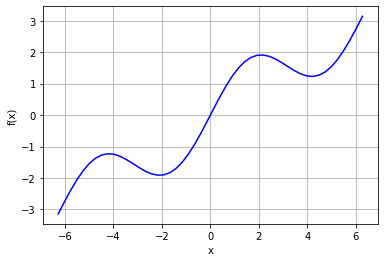

In [3]:
# np.linspace(start, stop, num) : start 부터 stop 까지 num개의 점으로 균등 분할한 위치 반환

x = np.linspace(-2 * np.pi, 2 * np.pi, 50)
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

# 9.1.1 회귀법

단항식 기저 함수( 1, x, x^2, x^3, ... )

In [4]:
# 최적 파라미터 결정 함수 : polyfit
# 주어진 입력 값에 대해 그차 값 계산 함수 : polyval

In [5]:
# deg : 회귀 다항식의 차수

reg = np.polyfit(x, f(x), deg = 1)
ry = np.polyval(reg, x)

Text(0, 0.5, 'f(x)')

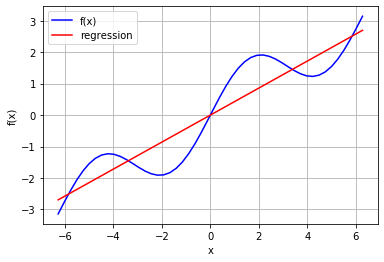

In [6]:
plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, ry, 'r', label = 'regression')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

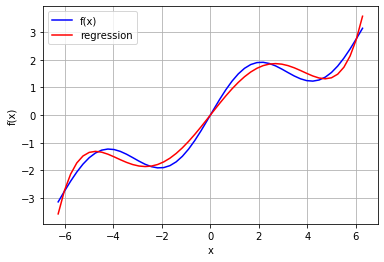

In [7]:
# 5차

reg = np.polyfit(x, f(x), deg = 5)
ry = np.polyval(reg, x)

plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, ry, 'r', label = 'regression')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

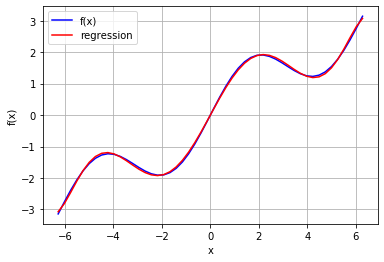

In [8]:
# 7차

reg = np.polyfit(x, f(x), deg = 7)
ry = np.polyval(reg, x)

plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, ry, 'r', label = 'regression')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [9]:
# -> 7차까지 하면 매우 비슷

np.allclose(f(x), ry)

# But, 일치하지는 않는다

False

In [10]:
np.sum((f(x) - ry) ** 2) / len(x)

# 평균 제곱 오차 값이 작다

0.0017769134759517593

개별 기저 함수
 - 단순 단항식 기저 x -> 적합한 기저 함수 선택 -> 결과 향상

In [11]:
matrix = np.zeros((3+1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

In [12]:
# np.linalg : 최소 자승 최적화 문제 해결 위한 lstsq함수 제공
# -> lstsq 함수 적용 -> 기저 함수에 대한 최적 파라미터 산출

reg = np.linalg.lstsq(matrix.T, f(x))[0]
reg

C:\Users\anrnd\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


array([ 1.50654604e-14,  5.62777448e-01, -1.11022302e-15, -5.43553615e-03])

Text(0, 0.5, 'f(x)')

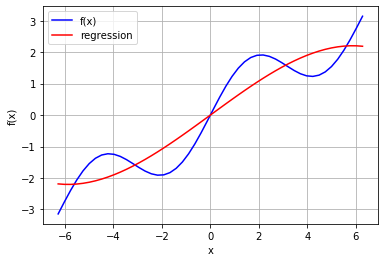

In [13]:
ry = np.dot(reg, matrix)
plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, ry, 'r', label = 'regression')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

# 결과 좋지 않아

C:\Users\anrnd\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'f(x)')

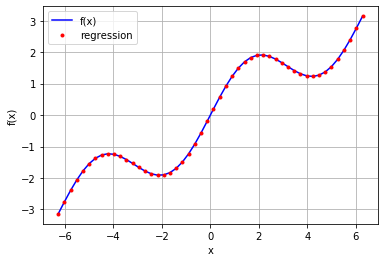

In [14]:
matrix[3, :] = np.sin(x) # 행렬 교체

reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)

plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, ry, 'r.', label = 'regression')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [15]:
np.allclose(f(x), ry)

True

In [16]:
np.sum((f(x) - ry) ** 2) / len(x)

3.345571424993955e-31

In [17]:
reg 

array([4.2004068e-16, 5.0000000e-01, 0.0000000e+00, 1.0000000e+00])

부정확한 측정으로 얻은 자료

In [18]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

Text(0, 0.5, 'f(x)')

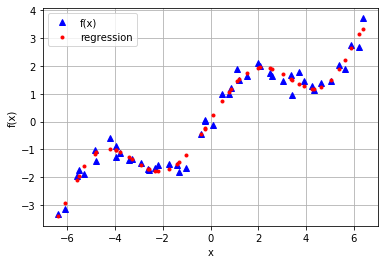

In [19]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

plt.plot(xn, yn, 'b^', label = 'f(x)')
plt.plot(xn, ry, 'r.', label = 'regression')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

# 회귀법 : 잡음을 어느정도 소거해준다

정렬되지 않은 자료

In [20]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
yu = f(xu)

In [21]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[ 4.37 -6.25  6.14  0.01 -0.49  3.91 -3.64  4.23  4.41 -5.57]
[ 1.24 -3.08  2.93  0.01 -0.71  1.26 -1.34  1.23  1.25 -2.13]


Text(0, 0.5, 'f(x)')

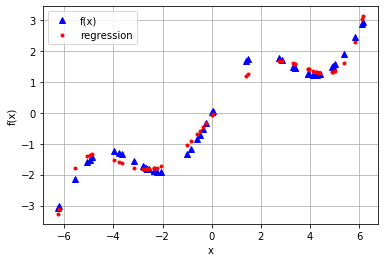

In [22]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

plt.plot(xu, yu, 'b^', label = 'f(x)')
plt.plot(xu, ry, 'r.', label = 'regression')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

# 관측점의 순서에 영향 X

다차원 자료

In [23]:
def fm(xy):
    x,y = xy
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [24]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X,Y = np.meshgrid(x,y) # 1차원 배열에서 2차원 그리드 생성
Z = fm((X,Y))
x = X.flatten()
y = Y.flatten()

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

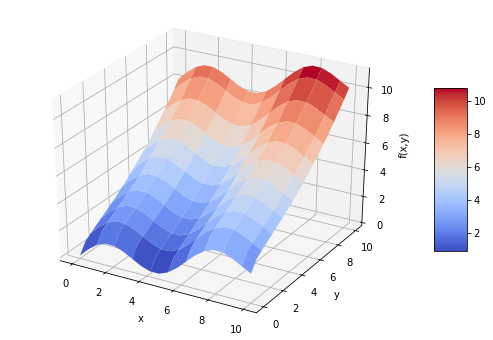

In [26]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(X, Y, Z, rstride = 2, cstride = 2,
                      cmap = mpl.cm.coolwarm,
                      linewidth = 1, antialiased = True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink = 0.5, aspect = 5) # 오른쪽 color바 조정

In [27]:
# 함수에 포함된 사인 함수, 제곱근 함수 포함된 기저 집합 생성

matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [2]:
# statsmodels : 일차원, 다차원에서 모두 사용 가능한 최소 자승 회귀 계한 함수 OLS 제공
import statsmodels.api as sm
model = sm.OLS(fm((x, y)), matrix).fit()

NameError: name 'fm' is not defined

In [29]:
# model.summary : 정보에 대한 요약본 얻을 수 있다.

In [30]:
model.rsquared

1.0

In [31]:
a = model.params # params : 최적 회귀 계수 들어있음
a

array([ 7.02216063e-15,  2.50000000e-01, -1.33226763e-15, -3.85108612e-16,
        5.00000000e-02,  1.00000000e+00,  1.00000000e+00])

In [32]:
def reg_func(a, xy):
    x,y = xy
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return (f6 + f5 + f4 + f3 + f2 + f1 + f0)

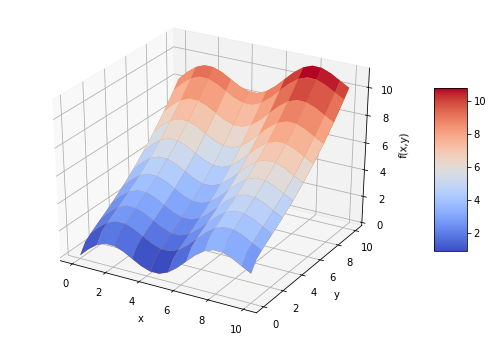

In [35]:
RZ = reg_func(a, (X, Y))
fig = plt.figure(figsize = (9,6))
ax = fig.gca(projection = '3d')
surf1 = ax.plot_surface(X, Y, Z, rstride = 2, cstride = 2,
                       cmap = mpl.cm.coolwarm, linewidth = 0.5,
                       antialiased = True)
surf2 = ax.plot_surface(X, Y, RZ, rstride = 2, cstride = 2,
                       label = 'regresstion')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
#ax.legend()
fig.colorbar(surf, shrink = 0.5, aspect = 5)

In [36]:
np.allclose(Z, RZ)

True

# 9.1.2 보간법 
    - 수학적으로 훨씬 더 복잡하고 다차원에 적용하기 어렵다
    - 관측점 자체 정확하게 재현 & 관측점에서 연속 미분가능한 함수여야한다.(즉, 최소 3차이상-큐빅 스플라인 함수) 
    - x축 방향으로 정렬된 자료 사용

In [ ]:
import scipy.interpolate as spi

In [38]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [39]:
def f(x):
    return np.sin(x) + 0.5 * x

In [40]:
# polyfit, polyval 대신 splrep, splev 사용 / 각 함수 인수 : p.299

1차 스플라인 보간법

In [41]:
ipo = spi.splrep(x, f(x), k = 1) 
iy = spi.splev(x, ipo)

Text(0, 0.5, 'f(x)')

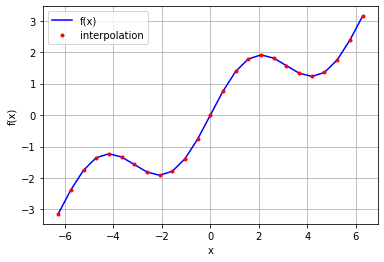

In [42]:
plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, iy, 'r.', label = 'interpolation')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [43]:
np.allclose(f(x), iy)

True

In [44]:
# 좀 더 작은 구간

In [45]:
xd = np.linspace(1,3,50)
iyd = spi.splev(xd, ipo)

Text(0, 0.5, 'f(x)')

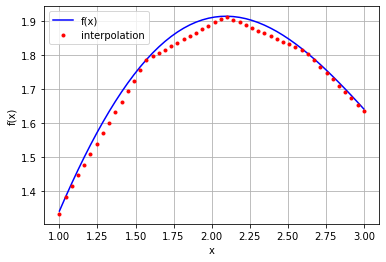

In [46]:
plt.plot(xd, f(xd), 'b', label = 'f(x)')
plt.plot(xd, iyd, 'r.', label = 'interpolation')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

3차 스플라인 보간법

In [47]:
ipo = spi.splrep(x, f(x), k = 3)
iyd = spi.splev(xd, ipo)

Text(0, 0.5, 'f(x)')

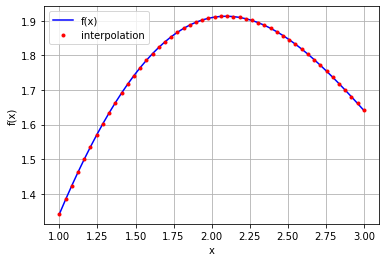

In [48]:
plt.plot(xd, f(xd), 'b', label = 'f(x)')
plt.plot(xd, iyd, 'r.', label = 'interpolation')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [49]:
np.allclose(f(xd), iyd) # 보간 완벽 X

False

In [50]:
np.sum((f(xd) - iyd) ** 2) / len(xd) # 최소 자승 오차는 아주 작다

1.1349319851436252e-08

#  9.2 최적화

In [51]:
def fm(xy):
    x,y = xy
    return np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2

In [52]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x,y)
Z = fm((X, Y))

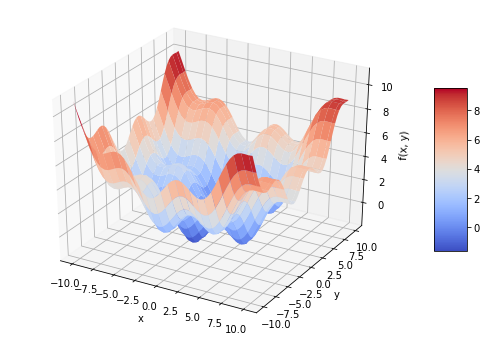

In [53]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(X, Y, Z, rstride = 2, cstride = 2,
                      cmap = mpl.cm.coolwarm, linewidth = 0.5, antialiased = True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink = 0.5, aspect = 5)

# 9.2.1 전역 최소화 방법 (brute 함수 사용)
 - 다소 시간이 걸리지만 전체 영역에서 가장 좋은 해 찾는 것 목표

In [3]:
import scipy.optimize as spo

In [55]:
def fo(xy):
    x,y = xy
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f %8.4f %8.4f' % (x, y, z))
    return z

In [56]:
# 간격을 5
output = True
spo.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)),finish = None)

-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([0., 0.])

In [58]:
# 간격을 0.1 -> 더 자세하게 조사 가능
output = False
opt1 = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish = None)
opt1

array([-1.4, -1.4])

In [60]:
fm(opt1)

-1.7748994599769203

# 9.2.2 국소 최적화 방법 (fmin 함수 사용)
 - 단시간에 일부 영역 내 가장 좋은 해 찾는 것 목표
 - 국소 전에 전역 최소화 할 것을 권장 -> 국소 최저점이 빠져 있다면 더 나은 국소 최소값 또는 전역 최소값 찾을 수 없기 때문

In [61]:
output = True
opt2 = spo.fmin(fo, opt1, xtol = 0.001, ftol = 0.001, maxiter = 15, maxfun = 20)
opt2

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757


array([-1.42702972, -1.42876755])

In [62]:
fm(opt2) # fm(opt1)과 큰 차이는 없지만 좀더 작은 값 찾아냄

-1.7757246992239009

In [63]:
output = False
spo.fmin(fo, (2, 2), maxiter = 250) # 위에서 찾은 최소값 보다 큰 값을 최소로 찾아냄

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

# 9.2.3 제약 조건 있는 최적화 (minimize 함수 사용)

In [ ]:
# minimize : 최소화하고자 하는 함수, 제약 조건이 되는 등식 & 부등식 (사전 객체를 원소로 가지는 리스트 객체 형태로)
#            인수 범위(튜플 객체를 원소로 가지는 튜플 객체 형태로)

In [ ]:
# MIN E(u(w_1)) = -(0.5 sqrt(w_1u) + 0.5 sqrt(w_1d))
# w_1u = 15a + 5b
# w_1d = 5a + 12b
# 100 >= 10a + 10b
# a,b >= 0

In [4]:
from math import sqrt

# 함수

def Eu(sb):
    s, b = sb
    return -(0.5 * sqrt(s * 15 + b * 5) + 0.5 * sqrt(s * 5 + b * 12))

# 제약 조건

cons = ({'type' : 'ineq', 'fun' : lambda sb: 100 - sb[0] * 10 - sb[1] * 10})

# 예산 제한 (임의의 충분히 큰 범위)

bnds = ((0, 1000), (0, 1000))

In [65]:
result = spo.minimize(Eu, (5, 5), method = 'SLSQP',
                     bounds = bnds, constraints = cons)

In [66]:
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

In [67]:
result['x'] # a 주식 8개, b 주식 2개 매입 해야 최적

array([8.02547122, 1.97452878])

In [68]:
# 최적 함수 값(최대 효용)
-result['fun']

9.700883611487832

In [69]:
np.dot(result['x'],[10,10])

99.99999999999999

# 9.3 정적분

In [5]:
import scipy.integrate as sci

In [6]:
def f(x):
    return np.sin(x) + 0.5 * x

In [7]:
a = 0.5 
b = 9.5
x = np.linspace(0,10)
y = f(x)

In [8]:
from matplotlib.patches import Polygon

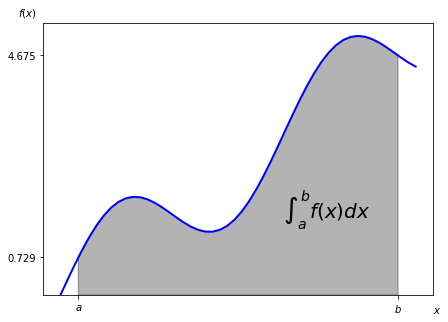

In [15]:
fig, ax = plt.subplots(figsize = (7, 5))
plt.plot(x, y, 'b', linewidth = 2)
plt.ylim(ymin = 0)

# 정적분 구간
ix = np.linspace(a, b)
iy = f(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor = '0.7', edgecolor = '0.5')
ax.add_patch(poly)

#라벨
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
        horizontalalignment = 'center', fontsize = 20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)])

# 9.3.1 수치적분

integrate 라이브러리
 - fixed_quad : 가우스 구적법
 - quad : 적응 구적법
 - romberg : 롬베르크 적분법

In [20]:
sci.fixed_quad(f, a, b)[0]

24.366995967084602

In [21]:
sci.quad(f, a, b)[0]

24.374754718086752

In [22]:
sci.romberg(f, a, b)

24.374754718086713

list or ndarray 객체 이용
 - trapz : 사다리꼴법
 - simps : 심슨 방법

In [23]:
xi = np.linspace(0.5, 9.5, 25)

sci.trapz(f(xi), xi)

24.352733271544516

In [24]:
sci.simps(f(xi), xi)

24.37496418455075

# 9.3.2 시뮬레이션을 사용한 적분

In [27]:
for i in range(1, 20):
    np.random.seed(1000) #의사 난수 
    x = np.random.random(i * 10) * (b - a) + a
    print(np.sum(f(x)) / len(x) * (b - a))

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


# 9.4 심볼릭 연산
          : 기호를 이용해, 기호적 수식의 연산 결과를 얻도록 하는 툴 모음
            - 파이썬 함수와 혼동 X
            
    - 3가지 형태로 수학식 표현
    1. 레이텍 기반 : IPython 노트북 에서 가장 시각적으로 좋은 선택
    2. 유니코드 기반
    3. 아스키 기반 : 별도 인쇄 기법 X -> 가장 단순

In [9]:
import sympy as sy

In [10]:
x = sy.Symbol('x')
y = sy.Symbol('y')
type(x)

sympy.core.symbol.Symbol

In [11]:
sy.sqrt(x)

sqrt(x)

In [12]:
3 + sy.sqrt(x) - 4 ** 2

sqrt(x) - 13

In [13]:
f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2
sy.simplify(f)

1.5*x**2 + 4.5

In [14]:
# 아스키 기반

sy.init_printing(pretty_print = False, use_unicode = False)
print(sy.pretty(f))

     2      
1.5*x  + 4.5


In [15]:
print(sy.pretty(sy.sqrt(x) + 0.5))

  ___      
\/ x  + 0.5


In [35]:
# -> 필요한 만큼 여러 줄 사용

In [16]:
# 수치적 계산도 가능

pi_str = str(sy.N(sy.pi, 400000))
pi_str[:40]

'3.14159265358979323846264338327950288419'

In [17]:
pi_str[-40:]

'8245672736856312185020980470362464176199'

In [18]:
pi_str.find('960428')

149989

# 9.4.2 방정식
    - x^2 - 1 = 0 해찾기 가능
    - x^2 - 1 = 3의 해는 x^2 -4 = 0으로 해야한다

In [19]:
sy.solve(x ** 2 -1)

[-1, 1]

In [20]:
sy.solve(x ** 2 - 1 - 3)

[-2, 2]

In [21]:
sy.solve(x ** 3 + 0.5 * x ** 2 - 1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [22]:
# 복수개 인자 or 복소수도 가능
sy.solve(x ** 2 + y ** 2)

[{x: -I*y}, {x: I*y}]

# 9.4.3 적분
    - 적분 구간에 대한 심볼 필요

In [23]:
a, b = sy.symbols('a b')

In [24]:
print(sy.pretty(sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b))))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [25]:
# integrate 함수 ->  부정적분 유도 가능
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)
print(sy.pretty(int_func))

      2         
0.25*x  - cos(x)


In [ ]:
# 3가지 방법

In [26]:
# 1
Fb = int_func.subs(x, 9.5).evalf()
Fa = int_func.subs(x, 0.5).evalf()

In [27]:
Fb - Fa

24.3747547180867

In [28]:
# 2
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))
print(sy.pretty(int_func_limits))

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


In [29]:
int_func_limits.subs({a : 0.5, b : 9.5}).evalf()

24.3747547180868

In [30]:
# 3
sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))

24.3747547180867

# 9.4.4 미분

In [31]:
int_func.diff() # 부정적분 함수 미분 -> 본래 함수

0.5*x + sin(x)

In [32]:
# 미분 -> 최적화 문제 정확한 해 유도

f = (sy.sin(x) + 0.05 * x ** 2
    + sy.sin(y) + 0.05 * y ** 2)

In [33]:
# x, y에 대한 편미분 필요
del_x = sy.diff(f, x)
del_y = sy.diff(f, y)

In [59]:
# 전역 최소화 => 두 편미분 값 모두 0
# 심볼릭 해가 존재한다는 보장은 X, But 위의 최적화에서 나온 결과를 시작점으로 이용하여 풀 수는 있다

xo = sy.nsolve(del_x, -1.5)
yo = sy.nsolve(del_y, -1.5)

# 국소 최소점
f.subs({x : xo, y : yo}).evalf()

-1.77572565314742

In [60]:
# 특정점 이용 X -> 전역 최소점이 아닌 국소 최소점을 구할 수도 있다
xo = sy.nsolve(del_x, 1.5)
yo = sy.nsolve(del_y, 1.5)

f.subs({x : xo, y : yo}).evalf()

2.27423381055640

## 함수 근사 : 이자율 곡선 보간 or 아메리칸 옵션 가치 계산을 위한 회귀 기반 몬테카를로 분석 등등에서 활용 
## 최적화 : 옵션 가격 계산 변수들을 시장 호가 or 내재변동성에 맞추는 경우 활용
## 수치적분 : 옵션/파생상품 가격 계산시 활용